1. What is Softmax_and_tanh_Functions_with_Derivatives and its use ?

# Softmax and tanh Functions with Derivatives - Visualization and Comparison

This project provides a **combined visualization** of two essential activation functions used in neural networks:

* **Softmax** function and its **derivatives** (Jacobian diagonal)
* **tanh** function and its **derivative**

It is designed to help you understand their behaviors, derivatives, and appropriate use cases in deep learning.

---

## 🔢 Softmax Function

**Formula:**

```math
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
```

* **Purpose**: Converts a vector of real values into a **probability distribution**.
* **Range**: Values between **0 and 1** that **sum to 1**.
* **Common Use**: Final layer in classification problems (e.g., image classification, NLP).
* **Derivative**: Returns a **Jacobian matrix** used during backpropagation.

---

## 🔁 tanh Function

**Formula:**

```math
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
```

* **Purpose**: Outputs zero-centered values.
* **Range**: Values between **-1 and 1**.
* **Common Use**: Hidden layers in neural networks.
* **Derivative:**

```math
\tanh'(x) = 1 - \tanh^2(x)
```

* **Advantage**: Helps avoid bias shifts and gradient saturation compared to sigmoid.

---

## 📊 Combined Visualization

The chart plots:

* **Softmax outputs** for a 3-element input vector as one element varies
* **Diagonal of the softmax Jacobian matrix** (derivatives)
* **tanh function curve**
* **Derivative of tanh**

This helps compare:

* Smoothness
* Sensitivity to inputs
* Behavior over the same input domain

---

## 💡 Why This Matters

| Feature          | Softmax                     | tanh                    |
| ---------------- | --------------------------- | ----------------------- |
| Output Range     | (0, 1), sum = 1             | (-1, 1)                 |
| Use Case         | Final output in classifiers | Hidden layer activation |
| Non-linearity    | Yes                         | Yes                     |
| Derivative Shape | Varies with input vector    | Peaks at 0, symmetric   |
| Problem Solving  | Class probability           | Feature transformation  |

---

## 🛠️ Usage

Run the provided Python code in your Jupyter Notebook to generate the combined chart. It requires:

* `numpy`
* `matplotlib`

```bash
pip install numpy matplotlib
```

Then copy the full Python script into a code cell.

---

## 📂 License

This project is released under the [MIT License](LICENSE).

---

## 🙋‍♂️ Author

Developed by \[Your Name]. Contributions and suggestions are welcome!

---

## 🌐 References

* Deep Learning with Python by François Chollet
* Stanford CS231n: Convolutional Neural Networks for Visual Recognition


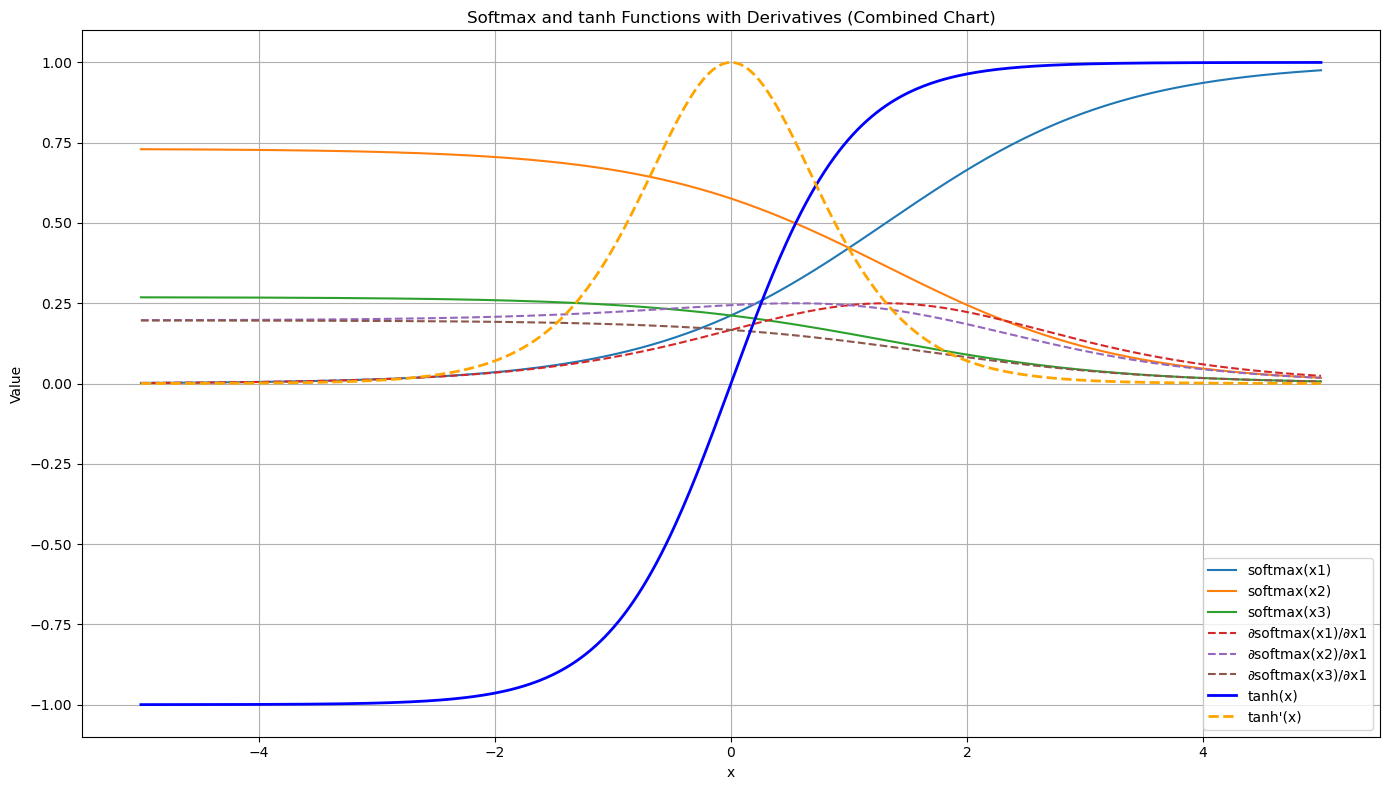

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax function and its derivative
def softmax(x):
    e_x = np.exp(x - np.max(x))  # stability improvement
    return e_x / e_x.sum()

def softmax_derivative(x):
    s = softmax(x)
    return np.diag(s) - np.outer(s, s)

# tanh function and its derivative
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Prepare input values
x_vals = np.linspace(-5, 5, 500)
x_tanh = x_vals  # same domain

# Initialize lists for softmax
softmax_outputs = []
softmax_derivatives = []

# Generate softmax outputs and derivatives
for x in x_vals:
    v = np.array([x, 1.0, 0.0])  # only x1 varies
    s = softmax(v)
    J = softmax_derivative(v)
    softmax_outputs.append(s)
    softmax_derivatives.append(np.diag(J))

softmax_outputs = np.array(softmax_outputs)
softmax_derivatives = np.array(softmax_derivatives)

# tanh and its derivative
y_tanh = tanh(x_tanh)
y_tanh_derivative = tanh_derivative(x_tanh)

# Plot everything in one chart
plt.figure(figsize=(14, 8))

# Softmax outputs
plt.plot(x_vals, softmax_outputs[:, 0], label='softmax(x1)', linestyle='-')
plt.plot(x_vals, softmax_outputs[:, 1], label='softmax(x2)', linestyle='-')
plt.plot(x_vals, softmax_outputs[:, 2], label='softmax(x3)', linestyle='-')

# Softmax derivatives
plt.plot(x_vals, softmax_derivatives[:, 0], label='∂softmax(x1)/∂x1', linestyle='--')
plt.plot(x_vals, softmax_derivatives[:, 1], label='∂softmax(x2)/∂x1', linestyle='--')
plt.plot(x_vals, softmax_derivatives[:, 2], label='∂softmax(x3)/∂x1', linestyle='--')

# tanh and its derivative
plt.plot(x_tanh, y_tanh, label='tanh(x)', color='blue', linewidth=2)
plt.plot(x_tanh, y_tanh_derivative, label="tanh'(x)", color='orange', linestyle='--', linewidth=2)

# Labels and legend
plt.title('Softmax and tanh Functions with Derivatives (Combined Chart)')
plt.xlabel('x')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
